In [55]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

# Formation energy as  chemical potential vary


 #### Total Energies in eV

In [56]:
E0=-14644858.463124419 # pristine
E1=-14711404.113635940 # addon S
E2=-14578308.639903018 # mono S vacancy
E3=-14511759.369944071 # di S vacancy up&down
E4=-14511758.944663303 # di S vacancy neighboring
E5=-14192154.320500717 # mono Mo vacancy
E_WSe2=-585793.321771426 # primtitive
ESe8=-532375.657399940   #8 atoms in unitcell
mu_Se8=ESe8/8
EW=-905397.333160509 # Total energy in eV
mu_Wbcc=EW/2



In [57]:
p0=1e+06  # 
k=1.380649e-16
h=6.62607015e-27
hbar=1.054571817e-27
sigma=8
pi=3.14159265359
m=1.04907603472e-21
IA=4.149045888664045e-37 
IB=4.149088585718857e-37
IC=7.612594467348306e-37
R=8.31446261815324
convert=29979245800.0*2*pi #cm^-1 to Hz

In [58]:
A=[]
for T in range(300,4500,100):
    A = np.append(np.log((((2*pi*m)**(3/2))*((k*T)**(5/2)))/(p0*(h**3))),A)
    

In [59]:
B=[]
for T in range(300,4500,100):
    I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
    B=np.append(np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*k*T)/(h**2))**(3/2))*I),B)

In [60]:
C=[]
w=[35.720038406727,35.788201571001,65.360254226816,65.389780783909,90.207394594899,90.227279171666,104.19445300601,
106.72662601322,117.61853788420,117.62193636527,213.54597619628,232.04616772547,232.06262935387,259.45646133170,
259.47716334035,261.04584683119,261.05974864895,262.62491469909]
w=np.array(w)*convert
for T in range(300,4500,100):
    temp=-numpy.array([(np.log(1-math.exp(-(hbar*i)/(k*T)))) for i in w])
    C=np.append(np.sum(temp),C)

In [61]:
D=[]

temp=numpy.array([(hbar*i)/(2) for i in w])
D=np.sum(temp)


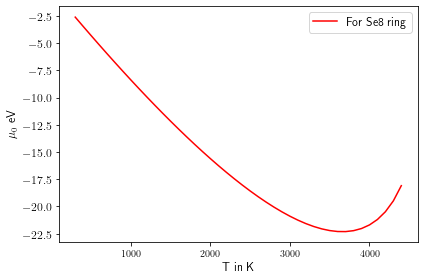

In [62]:
k=8.617333262145e-05 ###########
T=arange(300,4500,100)
mu_0=-k*T*(A+B+C)
plt.plot(T,mu_0, 'red', label='For Se8 ring') 
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{0}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [63]:
E_DFT=ESe8 #ev
p=80928.07673696567 #cgs

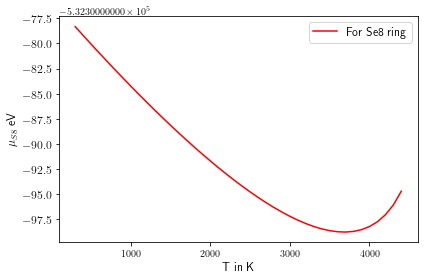

In [64]:
T=arange(300,4500,100)
mu_S8=mu_0 + k*T*np.log(p/p0)+D + E_DFT
plt.plot(T,mu_S8, 'red', label='For Se8 ring')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

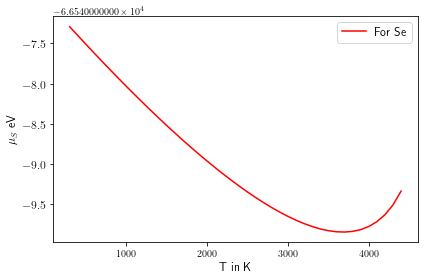

In [65]:
mu_Se=mu_S8/8
plt.plot(T,mu_Se, 'red', label='For Se')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{S}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [66]:
k=8.617333262145e-5
hbar=6.582119569e-16

In [67]:
def free_energy(w):
   F=[]
  
   w = numpy.array(w)
   for T in arange(300,4500,100):
      
     temp=numpy.array([(hbar*i/2 + k*T*np.log(1-math.exp(-(hbar*i)/(k*T)))) for i in w])
     F.append(numpy.sum(temp))


   return F

In [68]:
def DeltaF(A,B):
   deltaF=[]
   F1=free_energy(A)
   F2=free_energy(B)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 

In [69]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VSe', sep='\s+',header=0)
d3=pd.read_csv('VSe2', sep='\s+',header=0)
d4=pd.read_csv('VSe22', sep='\s+',header=0)
d5=pd.read_csv('VW', sep='\s+',header=0)

# cm-1 to Hz
convert=29979245800.0*2*pi #cm^-1 to Hz
hbar=6.582119569e-16 
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VSe']*convert
w3=d3['VSe2']*convert
w4=d4['VSe22']*convert
w5=d5['VW']*convert #THZ to Hz

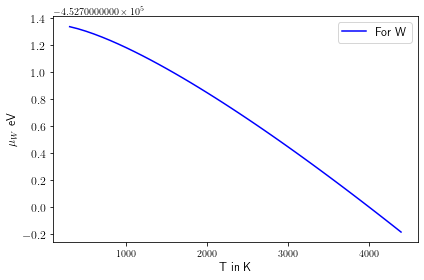

In [70]:
EW=-905397.333160509  # Total energy in eV
mu_Wbcc=EW/2

convert=29979245800.0*2*pi #cm^-1 to Hz
d6=pd.read_csv('W_BCC', sep='\s+',header=0)
w=d6['x']*convert # kj/mol to eV
Fphon=free_energy(w)
Fphon=np.array(Fphon)


V=  0.313300E+02  # volume of unitcell A^3
p= 7.776416678793729e-07 # atm
PV=p*V*6.3242093e-07 # to eV
T=arange(300,4500,100)
mu_W=(1/2)*(EW+PV+ Fphon)

plt.plot(T,mu_W, 'blue', label='For W')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{W}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muW_T.pdf')

In [71]:
def conc(r):
   rho=[]
   for T,i in zip(arange(300,4500,100),r):
 #  for T in arange(100,1010,10):
       temp=math.exp(-i/(k*T))
       rho.append(temp)
   return rho

In [72]:
addS = [E1-E0-a + b for a, b in zip(mu_Se, DeltaF(w1,w0))]
VSe = [E2-E0+a + b for a, b in zip(mu_Se, DeltaF(w2,w0))]
VSe2 = [E3-E0+2*a + b for a, b in zip(mu_Se, DeltaF(w3,w0))]
VSe22 = [E4-E0+2*a + b for a, b in zip(mu_Se, DeltaF(w4,w0))]
VW = [E5-E0+a + b for a, b in zip(mu_W, DeltaF(w5,w0))]

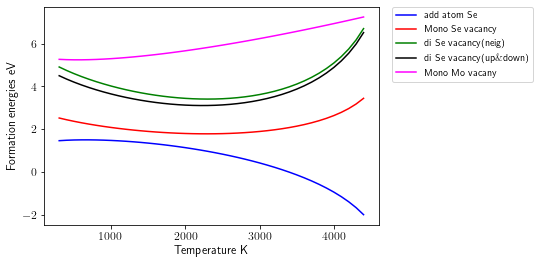

In [73]:
T=arange(300,4500,100)
plt.plot(T, addS, 'b', label='add atom Se')
plt.plot(T, VSe, 'r', label='Mono Se vacancy')
plt.plot(T, VSe22, 'g', label='di Se vacancy(neig)') 
plt.plot(T, VSe2, 'k', label=r'di Se vacancy(up$\&$down)')
plt.plot(T, VW, 'magenta', label='Mono Mo vacany') 
plt.xlabel('Temperature K', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_T.pdf')
plt.show()

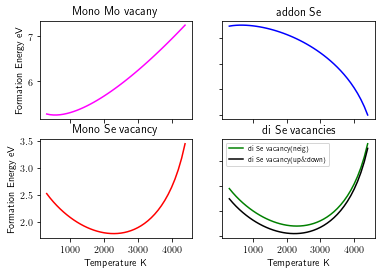

In [75]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(T, VW, 'magenta', label='Mono W vacany')
axs[0, 0].set_title('Mono Mo vacany')
axs[0, 1].plot(T, addS, 'b', label='addon Se')
axs[0, 1].set_title('addon Se')
axs[1, 0].plot(T, VSe, 'r', label='Mono Se vacancy')
axs[1, 0].set_title('Mono Se vacancy')
axs[1, 1].plot(T, VSe22, 'g', label='di Se vacancy(neig)')
axs[1, 1].plot(T, VSe2, 'k', label=r'di Se vacancy(up$\&$down)')
axs[1, 1].set_title('di Se vacancies')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel='Formation Energy eV')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Ef_2_T.pdf')   

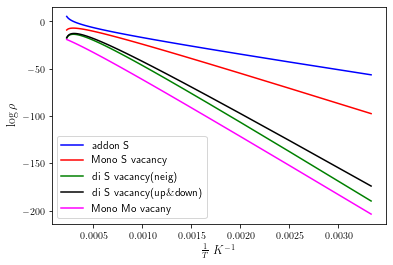

In [77]:
rho1=conc(addS)
rho2=conc(VSe)
rho3=conc(VSe22)
rho4=conc(VSe2)
rho5=conc(VW)

T=arange(300,4500,100)

plt.plot(1/T,np.log(rho1) , 'b', label='addon S')
plt.plot(1/T, np.log(rho2), 'r', label='Mono S vacancy') 
plt.plot(1/T, np.log(rho3), 'g', label='di S vacancy(neig)') 
plt.plot(1/T, np.log(rho4), 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(1/T, np.log(rho5), 'magenta', label='Mono Mo vacany') 
plt.xlabel(r'$\frac{1}{T}$ $ K^{-1}$', fontsize=12)
plt.ylabel(r'$\log\rho $', fontsize=12)
plt.legend(fontsize=11)
plt.savefig('logarithm_rho.pdf')  
plt.show()

In [ ]:
T=arange(300,4100,100)
plt.plot(T,rho1 , 'b', label='addon S')
plt.plot(T, rho2, 'r', label='Mono S vacancy') 
plt.plot(T, rho3, 'g', label='di S vacancy(neig)') 
plt.plot(T, rho4, 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(T, rho5, 'magenta', label='Mono W vacany') 

plt.xlabel('Temperature K', fontsize=12)
plt.ylabel(r'Defect Concentration $\rho$', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('rho_T.pdf')
plt.show()